Below mentioned code is written with the assumption that we are having 2 directories namely CATS and DOGS in the present directory. These directories has images of cats and dogs respectively. Directories are not uploaded to github because of large size.

However, images cab be downloaded from https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765



In [1]:
import os
import cv2
import numpy as np
import tqdm as tqdm
import torch
from tqdm import tqdm as tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


REBUILD_DATA = True

path = '/content/drive/MyDrive/Cat an Dog/kagglecatsanddogs_3367a/PetImages/'
class DogsVSCats():
    IMG_SIZE = 224
    cats = path+"Cat"
    dogs = path+"Dog"
    LABELS = {cats: 0, dogs: 1}
    
    training_data = []
    
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                
                    path = os.path.join(label,f)
                    
                    img = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.cats:
                        self.catcount+=1
                    elif label == self.dogs:
                        self.dogcount+=1
                except Exception as e:
                    pass
            
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("cats: "+str(self.catcount))
        print("dogs: "+str(self.dogcount))
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

/content/drive/MyDrive/Cat an Dog/kagglecatsanddogs_3367a/PetImages/Cat


100%|██████████| 12551/12551 [01:32<00:00, 135.14it/s]


/content/drive/MyDrive/Cat an Dog/kagglecatsanddogs_3367a/PetImages/Dog


100%|██████████| 12521/12521 [01:27<00:00, 143.88it/s]
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


cats: 12526
dogs: 12490


# Visualizing Data

In [4]:
import os
import cv2
import numpy as np
import tqdm as tqdm
import torch

In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [6]:
device

device(type='cuda', index=0)

In [7]:
import numpy as np
training_data = np.load('/content/drive/MyDrive/training_data.npy', allow_pickle=True)

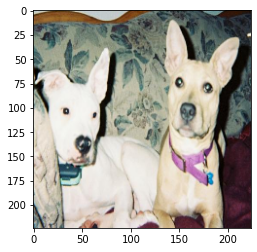

In [8]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0], cmap="gray")

# Building Model

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [10]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [11]:
model.classifier = nn.Sequential(*list(model.classifier.children())[:-7])

In [12]:
model = model.to(device)

In [13]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [14]:
model(torch.reshape(torch.tensor(training_data[0][0],dtype=torch.float32),(-1,3,224,224)).to(device)).shape

torch.Size([1, 25088])

In [15]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(25088,2048)
        self.fc2 = nn.Linear(2048,1024)
        self.fc3 = nn.Linear(1024,512)
        self.fc4 = nn.Linear(512,64)
        self.fc5 = nn.Linear(64,2)
        self.drop = nn.Dropout(p=0.5, inplace=False)

    def forward(self,x):
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
#         x = F.relu(x)
        x = self.fc5(x)
        
        return x

net = Net().to(device)

In [16]:
model(torch.reshape(torch.tensor(training_data[0][0],dtype=torch.float32).to(device),(-1,3,224,224)))

tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000, 132.2269,  32.6823]],
       device='cuda:0', grad_fn=<ReshapeAliasBackward0>)

In [17]:
net(model(torch.reshape(torch.tensor(training_data[0][0],dtype=torch.float32).to(device),(-1,3,224,224))))

tensor([[-0.3057, -1.7989]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Training the Model

In [18]:
batch_size = 1000
epochs = 12
val_size = int(0.9*training_data.shape[0])

In [20]:

from tqdm import tqdm as tqdm

optimizer = torch.optim.Adam(net.parameters(), lr=0.00001, weight_decay=1e-5)  

for _ in range(epochs):
  count = 0
  cum_loss = 0
  for i in tqdm(range(len(training_data))):
      with torch.no_grad():
          emb = model(torch.reshape(torch.tensor(training_data[i][0],dtype=torch.float32).to(device),(-1,3,224,224)))
      X=[]
      Y=[]
      X.append(emb)
      y = torch.tensor([training_data[i][1]],dtype=torch.float32).to(device)
      Y.append(y)
      if i%batch_size == 0 and i != 0:
        X = torch.cat(X,dim=0)
        X=X.view(-1,25088)
        Y = torch.cat(Y,dim=0)

        

        output = net(X)
        loss = F.binary_cross_entropy_with_logits(output, Y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        cum_loss+=loss
        count+=1
        
  print('train loss',cum_loss/count)



100%|██████████| 25016/25016 [01:43<00:00, 240.59it/s]


train loss tensor(0.8676, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:46<00:00, 235.36it/s]


train loss tensor(0.5851, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:47<00:00, 232.80it/s]


train loss tensor(0.5160, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:47<00:00, 231.64it/s]


train loss tensor(0.4377, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 231.16it/s]


train loss tensor(0.3777, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:50<00:00, 226.35it/s]


train loss tensor(0.2826, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 230.90it/s]


train loss tensor(0.2411, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 230.85it/s]


train loss tensor(0.1792, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 230.84it/s]


train loss tensor(0.1398, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 230.90it/s]


train loss tensor(0.2023, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 230.70it/s]


train loss tensor(0.1123, device='cuda:0', grad_fn=<DivBackward0>)


100%|██████████| 25016/25016 [01:48<00:00, 230.79it/s]

train loss tensor(0.0765, device='cuda:0', grad_fn=<DivBackward0>)


In [30]:
torch.save(net.state_dict(),f"catNdog.pth")

In [28]:
img = cv2.cvtColor(cv2.imread("cat_test.jpeg"),cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

In [29]:

net(model(torch.reshape(torch.tensor(img,dtype=torch.float32).to(device),(-1,3,224,224))))

tensor([[-2.7832,  2.1011]], device='cuda:0', grad_fn=<AddmmBackward0>)